**Created by: Laode Alif Ma'sum**

This notebook can be accessed on:

https://colab.research.google.com/drive/1tA_Fd33tzotkDa2YAr7UvL6OA6DfsZJp?usp=sharing

and can also be downloaded on:

https://github.com/alif5623/Credit-Risk-Prediction-Model

The dataset is obtained from:
https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Data Understanding

**Load the dataset into dataframe, print the first five elements of each column**

In [3]:
# Load the datasets from CSV files
loan_df = pd.read_csv("/content/drive/MyDrive/Dataset/loan_data_2007_2014.csv")
pd.set_option('display.max_columns', None)
print(loan_df.head())

<ipython-input-3-eee566b58006>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv("/content/drive/MyDrive/Dataset/loan_data_2007_2014.csv")


   Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT   

The dataset contains information about loan applications and their statuses. Each row represents the loan with various attributes describing the loan, borrower, and repayment status. The explanation of each column can be found on this data dictionary:

https://docs.google.com/spreadsheets/d/1iT1JNOBwU4l616_rnJpo0iny7blZvNBs/edit#gid=1001272030

# Exploratory Data Analysis (EDA)

**Print the shape of raw dataset**

In [4]:
print(loan_df.shape)

(466285, 75)


**Print the statistical description of raw dataset**

In [5]:
print(loan_df.describe())

          Unnamed: 0            id     member_id      loan_amnt  \
count  466285.000000  4.662850e+05  4.662850e+05  466285.000000   
mean   233142.000000  1.307973e+07  1.459766e+07   14317.277577   
std    134605.029472  1.089371e+07  1.168237e+07    8286.509164   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116571.000000  3.639987e+06  4.379705e+06    8000.000000   
50%    233142.000000  1.010790e+07  1.194108e+07   12000.000000   
75%    349713.000000  2.073121e+07  2.300154e+07   20000.000000   
max    466284.000000  3.809811e+07  4.086083e+07   35000.000000   

         funded_amnt  funded_amnt_inv       int_rate    installment  \
count  466285.000000    466285.000000  466285.000000  466285.000000   
mean    14291.801044     14222.329888      13.829236     432.061201   
std      8274.371300      8297.637788       4.357587     243.485550   
min       500.000000         0.000000       5.420000      15.670000   
25%      8000.000000      8000.000000    

**Count how many null values in every column**

In [6]:
loan_df.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

**Print every possible value in categorical column**

In [7]:
# Get the unique values and their counts in the 'loan_status' column
unique_values_counts = loan_df['loan_status'].value_counts()

# Print the unique values and their counts
print("Counts of unique values in column 'loan_status':")
print(unique_values_counts)

# Get the unique values and their counts in the 'application_type' column
unique_values_counts = loan_df['application_type'].value_counts()

# Print the unique values and their counts
print("Counts of unique values in column 'application_type':")
print(unique_values_counts)

# Get the unique values and their counts in the 'initial_list_status' column
unique_values_counts = loan_df['initial_list_status'].value_counts()

# Print the unique values and their counts
print("\nCounts of unique values in column 'initial_list_status':")
print(unique_values_counts)

# Get the unique values and their counts in the 'pymnt_plan' column
unique_values_counts = loan_df['pymnt_plan'].value_counts()
# Print the unique values and their counts
print("\nCounts of unique values in column 'pymnt_plan':")
print(unique_values_counts)

# Get the unique values and their counts in the 'emp_length' column
unique_values_counts = loan_df['emp_length'].value_counts()
# Print the unique values and their counts
print("\nCounts of unique values in column 'emp_length':")
print(unique_values_counts)

# Get the unique values and their counts in the 'term' column
unique_values_counts = loan_df['term'].value_counts()
# Print the unique values and their counts
print("\nCounts of unique values in column 'term':")
print(unique_values_counts)

Counts of unique values in column 'loan_status':
loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64
Counts of unique values in column 'application_type':
application_type
INDIVIDUAL    466285
Name: count, dtype: int64

Counts of unique values in column 'initial_list_status':
initial_list_status
f    303005
w    163280
Name: count, dtype: int64

Counts of unique values in column 'pymnt_plan':
pymnt_plan
n    466276
y         9
Name: count, dtype: int64

**Plot of Loan Amounts Distribution**

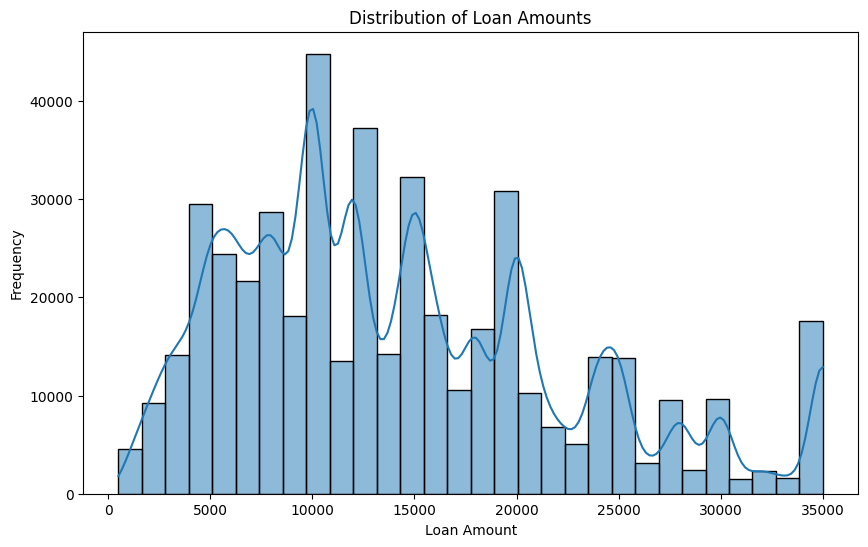

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_df['loan_amnt'], bins=30, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of Loan Ammounts. Based on the chart above, the peak frequency of loan amount is 10,000 with the number of frequency more than 40,000 loan.

**Plot of Interest Rates Distribution**

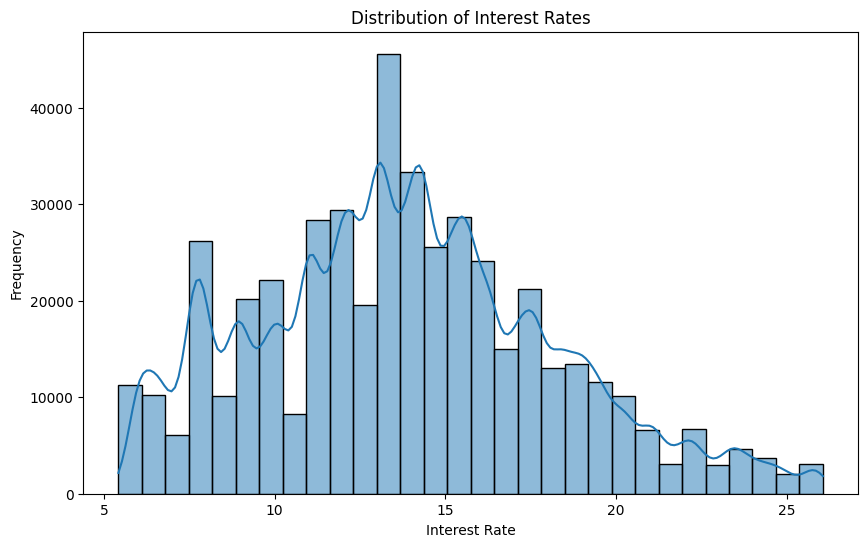

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_df['int_rate'], bins=30, kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of Interest Rates. Based on the chart above, the peak frequency of interest rates is around 13%-14% with the number of frequency more than 40,000 loan.


**Scatter Plot of Loan Amount and Interest Rate**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


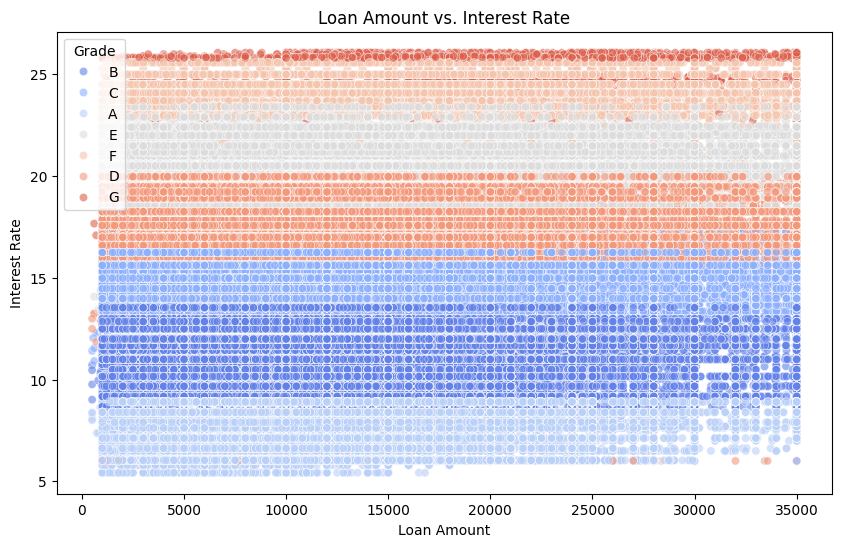

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_df, x='loan_amnt', y='int_rate', hue='grade', palette='coolwarm', alpha=0.6)
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.legend(title='Grade')
plt.show()

**Plot of the Loan Status Distribution**

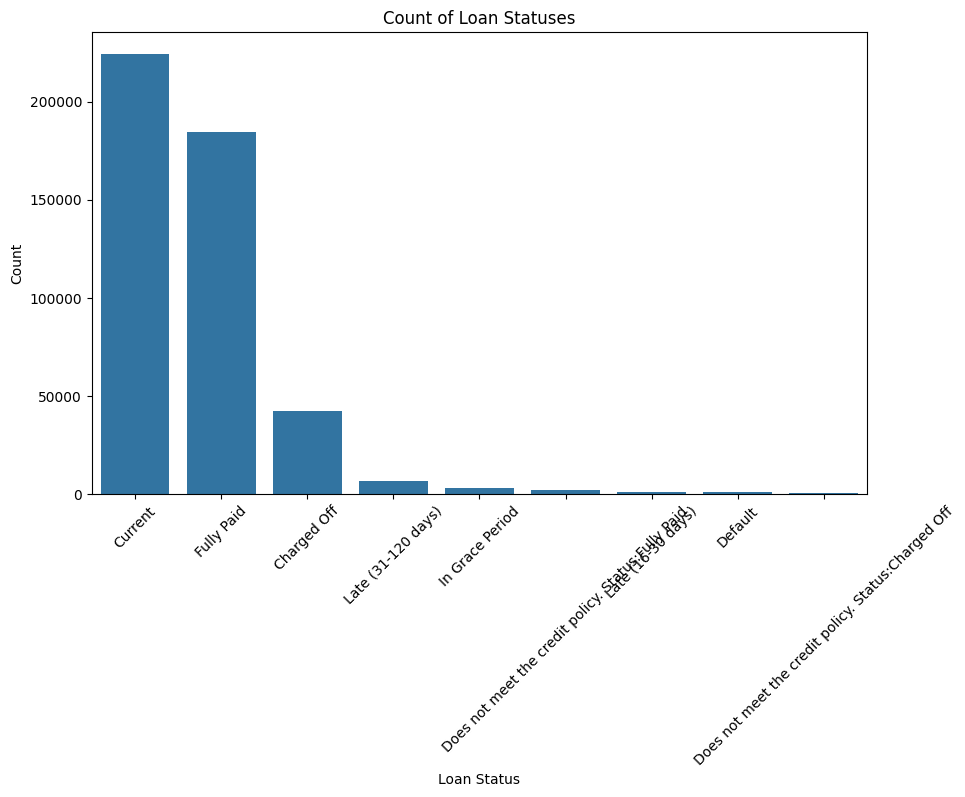

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_df, x='loan_status', order=loan_df['loan_status'].value_counts().index)
plt.title('Count of Loan Statuses')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The histogram shows the most frequent loan status is current, which means their still haven't fully paid the loan or get charged off.


**Removing Unused Descriptive Column**

In [17]:
columns_to_drop = ['Unnamed: 0', 'id', 'member_id', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'policy_code', 'addr_state', 'earliest_cr_line']

# Drop the columns
loan_df = loan_df.drop(columns=columns_to_drop)

**Remove Irrelevant and Redundant**


In [18]:
columns_to_drop = ['funded_amnt', 'funded_amnt_inv', 'issue_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'last_pymnt_d', 'grade']

# Drop the columns
loan_df = loan_df.drop(columns=columns_to_drop)

**Remove Unnecessary Null Column**

In [19]:
loan_df.dropna(axis=1, how='all', inplace=True)

In [20]:
# Remove rows where loan_status is "Current"
loan_df = loan_df[loan_df['loan_status'] != 'Current']

**Remove application type since all of the values are INDIVIDUAL**

In [21]:
# Drop the columns
loan_df = loan_df.drop(columns='application_type')

**Zero fill column**

In [22]:
loan_df['emp_length'] = loan_df['emp_length'].fillna(0)
loan_df['mths_since_last_delinq'] = loan_df['mths_since_last_delinq'].fillna(0)
loan_df['mths_since_last_record'] = loan_df['mths_since_last_record'].fillna(0)
loan_df['mths_since_last_major_derog'] = loan_df['mths_since_last_major_derog'].fillna(0)

**Fill null column with mean**

In [23]:
loan_df['tot_coll_amt'] = loan_df['tot_coll_amt'].fillna(loan_df['tot_coll_amt'].mean())
loan_df['tot_cur_bal'] = loan_df['tot_cur_bal'].fillna(loan_df['tot_cur_bal'].mean())
loan_df['total_rev_hi_lim'] = loan_df['total_rev_hi_lim'].fillna(loan_df['total_rev_hi_lim'].mean())

In [24]:
loan_df.isnull().sum()

loan_amnt                        0
term                             0
int_rate                         0
installment                      0
sub_grade                        0
emp_length                       0
home_ownership                   0
annual_inc                       4
verification_status              0
loan_status                      0
pymnt_plan                       0
purpose                          0
dti                              0
delinq_2yrs                     29
inq_last_6mths                  29
mths_since_last_delinq           0
mths_since_last_record           0
open_acc                        29
pub_rec                         29
revol_bal                        0
revol_util                     234
total_acc                       29
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_int       

In [25]:
loan_df = loan_df.dropna()

In [26]:
loan_df.isnull().sum()

loan_amnt                      0
term                           0
int_rate                       0
installment                    0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
loan_status                    0
pymnt_plan                     0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries

**Convert categorical into numerical**

In [27]:
# Convert 'term' from string to numerical
loan_df['term'] = loan_df['term'].str.replace(' months', '').astype(int)

**One hot encoding for categorical column**

In [28]:
# Convert categorical columns to dummy variables
loan_df = pd.get_dummies(loan_df, columns=['sub_grade', 'emp_length',
                                           'home_ownership', 'verification_status',
                                           'pymnt_plan', 'purpose', 'initial_list_status'])

**Putting a new label based on loan status**

Fully paid --> GOOD = 1

else --> BAD = 0

In [29]:
loan_df['credit_risk'] = loan_df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

**Data Splitting**

In [30]:
X = loan_df.drop(columns=['loan_status', 'credit_risk'])  # Drop 'loan_status' if it's not needed
y = loan_df['credit_risk']

In [31]:
#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (193460, 104) (193460,)
Test set: (48365, 104) (48365,)


# Data Modelling

**Logistic Regression**

In [41]:
# Define the parameter distributions
param_grid = {
    'penalty': ['l2', 'elasticnet'],
    'C': [1, 10],
    'solver': ['saga'],
    'l1_ratio': [0.2, 0.5]
}
# Initialize the model
model = LogisticRegression(max_iter=100)

# Setup Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

# Fit the Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

# Evaluate on training data
y_train_pred = best_model.predict(X_train)
y_train_pred_prob = best_model.predict_proba(X_train)[:, 1]
print("Training Data Performance:")
print(classification_report(y_train, y_train_pred))
print("AUC-ROC on Training Data:", roc_auc_score(y_train, y_train_pred_prob))

# Evaluate on test data
y_test_pred = best_model.predict(X_test)
y_test_pred_prob = best_model.predict_proba(X_test)[:, 1]
print("\nTest Data Performance:")
print(classification_report(y_test, y_test_pred))
print("AUC-ROC on Test Data:", roc_auc_score(y_test, y_test_pred_prob))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'C': 10, 'l1_ratio': 0.5, 'penalty': 'l2', 'solver': 'saga'}
Training Data Performance:
              precision    recall  f1-score   support

           0       0.99      0.78      0.87     45766
           1       0.94      1.00      0.97    147694

    accuracy                           0.95    193460
   macro avg       0.96      0.89      0.92    193460
weighted avg       0.95      0.95      0.94    193460

AUC-ROC on Training Data: 0.9798210445552472

Test Data Performance:
              precision    recall  f1-score   support

           0       0.99      0.78      0.88     11459
           1       0.94      1.00      0.97     36906

    accuracy                           0.95     48365
   macro avg       0.96      0.89      0.92     48365
weighted avg       0.95      0.95      0.95     48365

AUC-ROC on Test Data: 0.9801779972523151


**K-Nearest Neighbor**

In [25]:
Ks = 4
mean_acc_train = np.zeros((Ks-1))
mean_acc_test = np.zeros((Ks-1))
std_acc_train = np.zeros((Ks-1))
std_acc_test = np.zeros((Ks-1))

for n in range(1, Ks):
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)

    # Predictions and probabilities for training data
    y_train_pred = neigh.predict(X_train)
    y_train_pred_prob = neigh.predict_proba(X_train)[:, 1]

    # Predictions and probabilities for test data
    y_test_pred = neigh.predict(X_test)
    y_test_pred_prob = neigh.predict_proba(X_test)[:, 1]

    # Calculate accuracies
    mean_acc_train[n-1] = metrics.accuracy_score(y_train, y_train_pred)
    mean_acc_test[n-1] = metrics.accuracy_score(y_test, y_test_pred)
    std_acc_train[n-1] = np.std(y_train_pred == y_train) / np.sqrt(y_train_pred.shape[0])
    std_acc_test[n-1] = np.std(y_test_pred == y_test) / np.sqrt(y_test_pred.shape[0])

    print(f"\nResults for k={n}:")

    # Evaluate on training data
    print("Training Data Performance:")
    print(classification_report(y_train, y_train_pred))
    print("Confusion Matrix on Training Data:")
    print(confusion_matrix(y_train, y_train_pred))
    print("AUC-ROC on Training Data:", roc_auc_score(y_train, y_train_pred_prob))

    # Evaluate on test data
    print("Test Data Performance:")
    print(classification_report(y_test, y_test_pred))
    print("Confusion Matrix on Test Data:")
    print(confusion_matrix(y_test, y_test_pred))
    print("AUC-ROC on Test Data:", roc_auc_score(y_test, y_test_pred_prob))

print("Average accuracy of each hyperparameter variation (training data):")
print(mean_acc_train)
print("Average accuracy of each hyperparameter variation (test data):")
print(mean_acc_test)


Results for k=1:
Training Data Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45766
           1       1.00      1.00      1.00    147694

    accuracy                           1.00    193460
   macro avg       1.00      1.00      1.00    193460
weighted avg       1.00      1.00      1.00    193460

Confusion Matrix on Training Data:
[[ 45766      0]
 [     0 147694]]
AUC-ROC on Training Data: 1.0
Test Data Performance:
              precision    recall  f1-score   support

           0       0.90      0.83      0.87     11459
           1       0.95      0.97      0.96     36906

    accuracy                           0.94     48365
   macro avg       0.92      0.90      0.91     48365
weighted avg       0.94      0.94      0.94     48365

Confusion Matrix on Test Data:
[[ 9551  1908]
 [ 1067 35839]]
AUC-ROC on Test Data: 0.9022910179436768

Results for k=2:
Training Data Performance:
              precision    rec

# Evaluation

**Logistic Regression**

Based on the result of the model's accuracy, it can be concluded that the model is not overfitting since the test accuracy is slightly better than the training accuracy. It also can be said that the best parameter for logistic regression is [C': 10, 'l1_ratio': 0.5, 'penalty': 'l2']

**K-Nearest Neighbor**

Based on the average training and test accuracy of the model, it can be concluded that the model is **overfitting** since the training accuracy is higher than test accuracy. However, the overfitting is not severe since the difference between those 2 accuracy is only about 2%.